# DACON Wine
Kaggle wine에서는 마땅한 데이터 셋을 찾지 못해서.. DACON의 Wine 데이터 셋을 이용  
[데이터 셋 출처](https://dacon.io/competitions/open/235610/data)

### Classification - Random Forest
### 사용 라이브러리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Data Load

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.shape, test.shape

((5497, 14), (1000, 13))

### 범주형 데이터 수치형 데이터로 변경하기
`type`의 경우 범주형 데이터이므로 수치형 데이터로 전환함  
`white=1`, `red=0`


In [3]:
# train
temp = pd.get_dummies(train["type"], drop_first=True)
train = pd.concat([train, temp], axis=1).copy()
train.drop(columns="type", inplace=True)

In [4]:
# test
temp = pd.get_dummies(test["type"], drop_first=True)
test = pd.concat([test, temp], axis=1).copy()
test.drop(columns="type", inplace=True)

### Train - Random Forest

In [5]:
label_name = "quality"

features_names = train.columns.tolist()
features_names.remove("index")
features_names.remove(label_name)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train[features_names], train[label_name], test_size=0.2)

print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (4397, 12)
y_train: (4397,)
X_test: (1100, 12)
y_test: (1100,)


In [8]:
model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)

In [9]:
accuracy_score(pred_rf, y_test)

0.6581818181818182

### 모델 분석

In [10]:
model_rf.feature_importances_

array([0.07558543, 0.09873146, 0.08082788, 0.08685115, 0.08638481,
       0.08549418, 0.08958934, 0.10097141, 0.08243595, 0.08757996,
       0.12242768, 0.00312075])

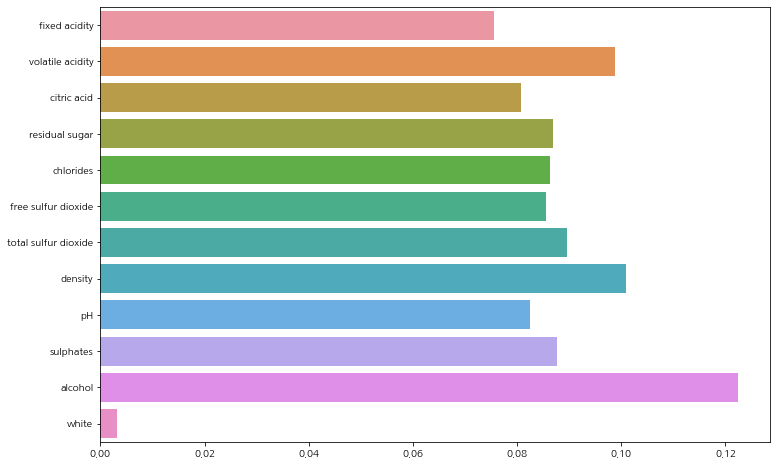

In [11]:
plt.figure(figsize=(12, 8))
_ = sns.barplot(x=model_rf.feature_importances_, y=model_rf.feature_names_in_)
plt.show()